# Importando los paquetes que vamos a usar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Carga de los datos

In [2]:
base_path = "dataset/datos_hogar_2020.csv"
df_global = pd.read_csv(base_path)

# Funciones comunes a todos los casos de estudio

Definimos en esta sección las funciones que vamos a usar a lo largo de todos los casos de estudio:

# Filtrado previo del dataset global

Definimos en variables todas las columnas que, al leer el documento explicando el *dataset*, nos han resultado de interés. Una vez hecho esto, filtramos el *dataset* global para quedarnos solo con esas columnas, pues el resto no las vamos a usar en ningún caso de estudio. Es más, muchas de estas columnas no las usaremos en ninguno de los tres casos de estudio.

In [3]:
# Definimos las columnas con las que nos vamos a quedar
renta_disponible_total_hogar = "HY020"
renta_ganada_alquilando = "HY040N"
ayuda_para_vivienda = "HY070N"
inversiones_de_capital = "HY090N"
retraso_pago_hipoteca_o_alquiler = "HS011"
retraso_pago_luz_agua_gas = "HS021"
retraso_pago_prestamos = "HS031"
capacidad_hogar_llegar_fin_mes = "HS120"
ingresos_minimos_para_llegar_fin_mes = "HS130"
vandalismo_en_la_zona = "HS190"
comunidad_autonoma = "DB040"

tipo_de_vivienda = "HH010"
regimen_de_tenencia_vivienda = "HH021"
habitaciones_vivienda = "HH030"

pidio_ayuda_economica_familiares = "H39A_U"
pidio_ayuda_economica_entidad = "H39B_U"
corte_energia = "H38A_U"

numero_miembros_hogar = "HX040"
tipo_de_hogar = "HX060" # Variable numerica categorica con muchos valores posibles
hogar_en_riesgo_pobreza = "vhPobreza"
hogar_carencia_material_severa = "vhMATDEP"

proposito_prestamos = lambda i: f"HI100_{i}"

cuota_hipoteca = "cuotahip"

# TODO -- estas variables no las tenemos disponibles en el dataset
#gasto_en_comida = "HC010"
#gasto_en_comida_bebida_fuera_casa = "HC020"
#gasto_transporte_publico = "HC030"
#gasto_transporte_privado = "HC040"
#viviendas_adicionales = "HV020"
#año_nacimiento = "PB140"
#sexo = "PB150"

# Filtramos todo el dataframe global para usar solo variables que en una primera
# lectura de las variables hemos considerado interesantes
df_global = df_global[[
    renta_disponible_total_hogar,
    renta_ganada_alquilando,
    ayuda_para_vivienda,
    inversiones_de_capital,
    retraso_pago_hipoteca_o_alquiler,
    retraso_pago_luz_agua_gas,
    retraso_pago_prestamos,
    capacidad_hogar_llegar_fin_mes,
    ingresos_minimos_para_llegar_fin_mes,
    vandalismo_en_la_zona,
    tipo_de_vivienda,
    regimen_de_tenencia_vivienda,
    habitaciones_vivienda,   
    pidio_ayuda_economica_familiares,
    pidio_ayuda_economica_entidad,
    corte_energia,
    numero_miembros_hogar,
    tipo_de_hogar,
    hogar_en_riesgo_pobreza,
    hogar_carencia_material_severa,
    comunidad_autonoma,


    
    # TODO -- borrar los propositos porque no parecen muy relevantes
    proposito_prestamos(1),
    proposito_prestamos(2),
    proposito_prestamos(3),
    proposito_prestamos(4),
    proposito_prestamos(5),
    proposito_prestamos(6),
    proposito_prestamos(7),
    proposito_prestamos(8),
    proposito_prestamos(9),  
    
    cuota_hipoteca,
]]

Veamos con qué tipo de datos nos hemos quedado:

In [4]:
df_global.describe()

,HY020,HY040N,HY070N,HY090N,HS011,HS021,HS031,HS120,HS130,HS190,...,HI100_1,HI100_2,HI100_3,HI100_4,HI100_5,HI100_6,HI100_7,HI100_8,HI100_9,cuotahip
count,15043.000000,15043.000000,15043.000000,15043.000000,6538.000000,14972.000000,3874.000000,15029.000000,14577.000000,15036.000000,...,3907.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3906.000000,3905.000000,3905.000000,3949.000000
mean,31923.953455,597.200527,44.600766,439.817903,2.858978,2.911969,2.864481,3.600905,1863.563628,1.861599,...,1.741234,1.536354,1.988223,1.934460,1.975678,1.903226,1.937532,1.978745,1.820743,472.389466
std,22626.484550,2487.349778,489.955873,3229.657848,0.420883,0.336180,0.411509,1.277720,1052.184371,0.345332,...,0.438013,0.498740,0.107894,0.247508,0.154065,0.295688,0.242035,0.144251,0.383617,278.946452
min,-36233.200000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16505.950000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1200.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,300.000000
50%,27535.710000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,4.000000,1600.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,412.000000
75%,41390.350000,0.000000,0.000000,31.800000,3.000000,3.000000,3.000000,5.000000,2200.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,580.000000
max,349862.130000,70271.000000,21600.000000,95460.200000,3.000000,3.000000,3.000000,6.000000,60000.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6800.000000


# Variables añadidas

También queremos usar variables agregadas usando las variables en bruto que ya tenemos en el dataset. 

Tenemos tres tipos de variable que nos indican si pidieron ayuda a algún ente, divididas en tres tipos de ente. Nos interesa solo si pidieron ayuda, no a quién

In [5]:
def pidio_ayuda_condicion(ayuda_familiar, ayuda_entidad):
    """Comprueba si, dadas las columnas de ayuda familiar y ayuda de entidad,
    se pidio ayuda o no se pidio"""
    
    if ayuda_familiar == 1 or ayuda_entidad == 1:
        return True
    else:
        return False



# Añadimos la nueva columna usando la condicion que hemos definido previamente
pidio_ayuda = "pidio_ayuda"
df_global[pidio_ayuda] = df_global.apply(lambda row: pidio_ayuda_condicion(row[pidio_ayuda_economica_familiares], row[pidio_ayuda_economica_entidad]), axis = 1)

Queremos tener una variable en la que dispongamos del dinero que le queda a una familia, de la forma $total\_ingresos - total\_gastos$ 

In [6]:
# TODO -- implementar esto

Añadimos una variable que recoja si ha habido retraso en cualquier tipo de pago:

In [7]:
def retraso_pagando(retraso_hipoteca, retraso_luz_agua, retraso_prestamos):
    """Comprueba si hubo algun retraso en cualquier tipo de pago"""
    
    # Hubo retraso en la hipoteca
    if retraso_hipoteca is not None and retraso_hipoteca != 3:
        return 1
    
    # Hubo retraso en la luz o el agua
    if retraso_luz_agua is not None and retraso_luz_agua != 3:
        return 1
    
    # Hubo retraso en algun prestamo
    if retraso_prestamos is not None and retraso_prestamos != 3:
        return 1

    # No hubo retraso en ningun apartado
    return 0


# Añadimos la nueva columna usando la condicion que hemos definido previamente
retraso_pago = "retraso_pago"
df_global[retraso_pago] = df_global.apply(lambda row: retraso_pagando(row[retraso_pago_hipoteca_o_alquiler], row[retraso_pago_luz_agua_gas], row[retraso_pago_prestamos]), axis = 1)

Añadimos el nombre real de las comunidades autonomas:

In [8]:
def map_nombre_comunidad(code_name):
    """Transformamos el codigo de la comunidad autonoma a su nombre real"""
    map_code_to_name = {
        "ES11": "Galicia", 
        "ES12": "Principado de Asturias" , 
        "ES13": "Cantabria" , 
        "ES21": "País Vasco" , 
        "ES22": "Comunidad Foral de Navarra" , 
        "ES23": "La Rioja" , 
        "ES24": "Aragón" , 
        "ES30": "Madrid" , 
        "ES41": "Castilla y Leon" , 
        "ES42": "Castilla-La Mancha" , 
        "ES43": "Extremadura", 
        "ES51": "Cataluña" , 
        "ES52": "Comunidad Valenciana" , 
        "ES53": "Illes Balears" , 
        "ES61": "Andalucía" , 
        "ES62": "Región de Murcia" , 
        "ES63": "Ceuta" , 
        "ES64": "Melilla" , 
        "ES70": "Canarias" , 
        "ESZZ": "Externo" , 
    }
    
    return map_code_to_name[code_name]

df_global[comunidad_autonoma] = df_global.apply(lambda row: map_nombre_comunidad(row[comunidad_autonoma]), axis = 1)

# Caso de estudio 01

## Definición del caso de estudio

En este caso de estudio queremos poner nuestra atención en aquellas personas que tuvieron algún retraso en cualquier tipo de pago. Usamos la variable que hemos definido previamente como agregado de los dos tipos de *retraso en el pago*.

In [9]:
# Tomamos los datos de aquellos hogares que pidieron ayuda economica
df_first = df_global[df_global[retraso_pago] == 1]

renta_disponible_total_hogar = "HY020"
renta_ganada_alquilando = "HY040N"
ayuda_para_vivienda = "HY070N"
inversiones_de_capital = "HY090N"
retraso_pago_hipoteca_o_alquiler = "HS011"
retraso_pago_luz_agua_gas = "HS021"
retraso_pago_prestamos = "HS031"
capacidad_hogar_llegar_fin_mes = "HS120"
ingresos_minimos_para_llegar_fin_mes = "HS130"
vandalismo_en_la_zona = "HS190"
comunidad_autonoma = "DB040"

tipo_de_vivienda = "HH010"
regimen_de_tenencia_vivienda = "HH021"
habitaciones_vivienda = "HH030"

pidio_ayuda_economica_familiares = "H39A_U"
pidio_ayuda_economica_entidad = "H39B_U"
corte_energia = "H38A_U"

numero_miembros_hogar = "HX040"
tipo_de_hogar = "HX060" # Variable numerica categorica con muchos valores posibles
hogar_en_riesgo_pobreza = "vhPobreza"
hogar_carencia_material_severa = "vhMATDEP"

proposito_prestamos = lambda i: f"HI100_{i}"

cuota_hipoteca = "cuotahip"

# Nos quedamos con las columnas que nos interesan para este caso de estudio
columnas_interesante = [
    renta_disponible_total_hogar,
    ayuda_para_vivienda,
]


df_first

,HY020,HY040N,HY070N,HY090N,HS011,HS021,HS031,HS120,HS130,HS190,...,HI100_3,HI100_4,HI100_5,HI100_6,HI100_7,HI100_8,HI100_9,cuotahip,pidio_ayuda,retraso_pago
0,0.00,0.0,0.0,0.0,NaN,3.0,NaN,5.0,1500.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
1,13221.50,0.0,0.0,0.0,NaN,3.0,NaN,1.0,1000.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
2,24500.00,0.0,0.0,0.0,3.0,3.0,NaN,5.0,1500.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,False,1
4,39660.00,0.0,0.0,0.0,3.0,3.0,NaN,4.0,3000.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.0,False,1
5,65000.00,0.0,0.0,0.0,NaN,3.0,NaN,5.0,1500.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15037,9060.90,0.0,0.0,0.0,NaN,3.0,NaN,2.0,1000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
15039,66003.88,2500.0,0.0,684.9,NaN,3.0,NaN,5.0,2000.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
15040,24702.60,0.0,0.0,0.0,NaN,3.0,3.0,3.0,1800.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1
15041,5564.10,0.0,0.0,0.0,NaN,3.0,NaN,2.0,900.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1


## Análisis exploratorio de datos

Antes de comenzar con el cálculo de *clusters*, realizamos un análisis exploratorio de datos previo. Empezamos mostrando la distribución de personas con retrasos en los pagos según comunidades autónomas:

In [12]:
# Creo un dataframe en el que agrupo el conteo de retrasos en el pago, agrupado por comunidad autonoma
retraso_pago_por_comunidad = pd.DataFrame()
retraso_pago_por_comunidad["total"] = df_first[[comunidad_autonoma, retraso_pago]].groupby(comunidad_autonoma)[retraso_pago].sum()

# Ordenamos por la suma de los restrasos en el pago
#retraso_pago_por_comunidad = retraso_pago_por_comunidad.sort_values(by = [retraso_pago], ascending = False)

# Limpiamos el dataframe
#retraso_pago_por_comunidad = retraso_pago_por_comunidad[[comunidad_autonoma, retraso_pago]]

# Mostramos la tabla con los resultados
retraso_pago_por_comunidad

,total
DB040,
Andalucía,1417
Aragón,552
Canarias,413
Cantabria,464
Castilla y Leon,913
Castilla-La Mancha,687
Cataluña,2342
Ceuta,182
Comunidad Foral de Navarra,308


<AxesSubplot:xlabel='total', ylabel='DB040'>

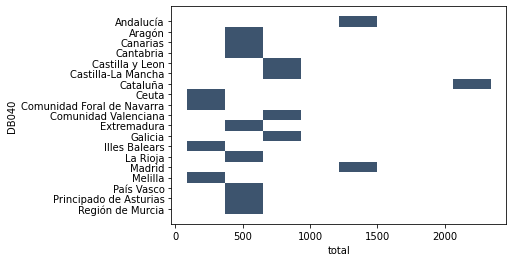

In [17]:
# Mostramos lo anterior de forma grafica
sns.histplot(data=retraso_pago_por_comunidad, y = comunidad_autonoma, x = "total")